In [6]:
# !apt install octave


The operation couldn’t be completed. Unable to locate a Java Runtime.
Please visit http://www.java.com for information on installing Java.



In [407]:
from oct2py import Oct2Py
oc = Oct2Py()
import pyhough
from pyhough import pm
from pyhough import gfh
from pyhough import physics
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# !rm -rf ./gfh/
# !git clone https://git.ligo.org/andrewlawrence.miller/gfh.git


In [11]:
# t00 = 1238732756

In [395]:

oc.addpath(oc.genpath('../pbh_cw/'))





    _pyeval at line 57 column 30

    _pyeval at line 57 column 30



'.:/Users/andrewmiller/opt/anaconda3/lib/python3.9/site-packages/oct2py:/Users/andrewmiller/opt/anaconda3/lib/python3.9/site-packages/octave_kernel:/opt/homebrew/Cellar/octave/8.4.0_3/share/octave/site/m:/opt/homebrew/Cellar/octave/8.4.0_3/share/octave/site/m/startup:/opt/homebrew/Cellar/octave/8.4.0_3/lib/octave/8.4.0/oct/aarch64-apple-darwin22.6.0:/opt/homebrew/Cellar/octave/8.4.0_3/share/octave/8.4.0/m:/opt/homebrew/Cellar/octave/8.4.0_3/share/octave/8.4.0/m/audio:/opt/homebrew/Cellar/octave/8.4.0_3/share/octave/8.4.0/m/deprecated:/opt/homebrew/Cellar/octave/8.4.0_3/share/octave/8.4.0/m/elfun:/opt/homebrew/Cellar/octave/8.4.0_3/share/octave/8.4.0/m/general:/opt/homebrew/Cellar/octave/8.4.0_3/share/octave/8.4.0/m/geometry:/opt/homebrew/Cellar/octave/8.4.0_3/share/octave/8.4.0/m/gui:/opt/homebrew/Cellar/octave/8.4.0_3/share/octave/8.4.0/m/help:/opt/homebrew/Cellar/octave/8.4.0_3/share/octave/8.4.0/m/image:/opt/homebrew/Cellar/octave/8.4.0_3/share/octave/8.4.0/m/io:/opt/homebrew/Cellar

In [397]:
minf = 150
maxf = 190
mc = 1e-2
white_noise = 1
amp = 1e-22
sig_type = 'power_law'
meth = 'gfh'
t00 = 1238777856+12500
sfdbdir = '/Users/andrewmiller/Desktop/sfdbs/H/'
Nsig = 1
n = 11/3
ref_perc_time = 0.5

In [398]:
t0 = oc.gps2mjd(t00)
fdotmin=oc.calc_fdot_chirp(mc,minf);
fdotmax=oc.calc_fdot_chirp(mc,maxf);
sour = oc.gen_N_power_law_sigs(Nsig,minf,minf,fdotmin,fdotmin,n,n,amp,t0);
t1=oc.calc_time_to_coalescence(mc,minf)
t2=oc.calc_time_to_coalescence(mc,maxf);           
dur=oc.floor(t1-t2);
TFFT=oc.round(1/oc.sqrt(fdotmax))
# oc.example_multi_sigs(1,150,160,1e-3,1,1e-22,'power_law','gfh')

In [399]:
job_pack_0=oc.inject_power_law_signal(sour,[minf, maxf],t00,dur,TFFT,sfdbdir,sig_type,white_noise);




chosen file
ans = H1:DCS-CALIB_STRAIN_GATED_SUB60HZ_C01_20190408_024000.SFDB09
calculating dsfact
f_band_you_want = 40
num_tot_ffts = 3
shitt
master_piahead =

  scalar structure containing the fields:

    eof = 0
    endian = 1
    detector = 2
    gps_sec = 1238789906
    gps_nsec = 0
    tbase = 1024
    firstfrind = 0
    nsamples = 2097152
    red = 128
    typ = 2
    n_flag = -1
    einstein = 9.999999682655225e-21
    mjdtime = 58581.84592592593
    nfft = 1325
    wink = 5
    normd = 7.629394531250000e-06
    normw = 1.206618905067444
    frinit = 0
    tsamplu = 2.441406250000000e-04
    deltanu = 9.765625000000000e-04
    vx_eq = 2.939266659990203e-05
    vy_eq = -8.585446990009374e-05
    vz_eq = -3.764287885977011e-05
    px_eq = -474.7298167901222
    py_eq = -141.6566072800092
    pz_eq = -61.41247919425324
    n_zeroes = 12632064
    sat_howmany = 0
    spare1 = 0
    spare2 = 0
    spare3 = 0
    spare4 = 0.752929687500000
    spare5 = 0
    spare6 = 0
    lavesp 

Text(0, 0.5, 'frequency (Hz)')

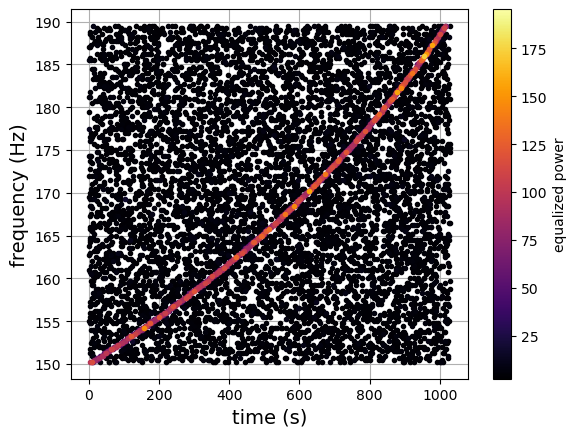

In [400]:
p = job_pack_0.peaks; ## the peakmap
pyhough.pm.python_plot_triplets((p[0,:]-p[0,0])*86400,p[1,:],p[2,:],'.',label='equalized power')
plt.xlabel('time (s)',size=14)
plt.ylabel('frequency (Hz)',size=14)

Text(0, 0.5, 'x')

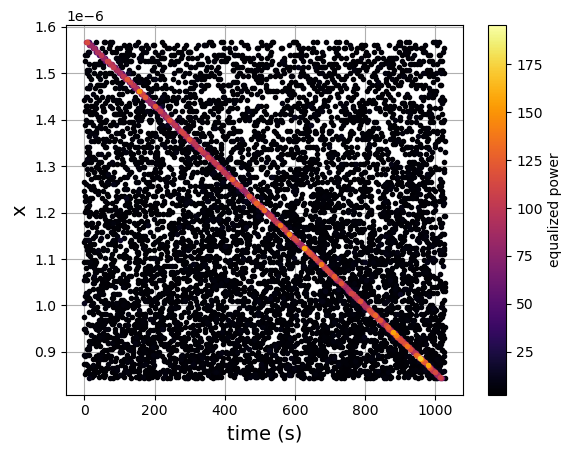

In [401]:
#### conceptual demonstration of what the generalized frequency-Hough sees
peaks_in_x = 1 / p[1,:]**(n-1)
pyhough.pm.python_plot_triplets((p[0,:]-p[0,0])*86400,peaks_in_x,p[2,:],'.',label='equalized power')
plt.xlabel('time (s)',size=14)
plt.ylabel('x',size=14)

In [402]:
gridk,dk = pyhough.gfh.andrew_long_transient_grid_k(TFFT,[minf, maxf],[fdotmin, fdotmax],dur,n);
gridk = np.squeeze(gridk)
gridk = np.squeeze(pyhough.gfh.cbc_shorten_gridk(gridk,sour['kn'],sour['kn']))
hm_job = pyhough.gfh.make_hm_job_struct(minf,maxf,TFFT,dur,n,ref_perc_time,gridk)

In [403]:
hmap,info = pyhough.gfh.hfdf_hough_transients(p, hm_job)

chirp, flipping spindowns to spinups


(1.1e-06, 1.3e-06)

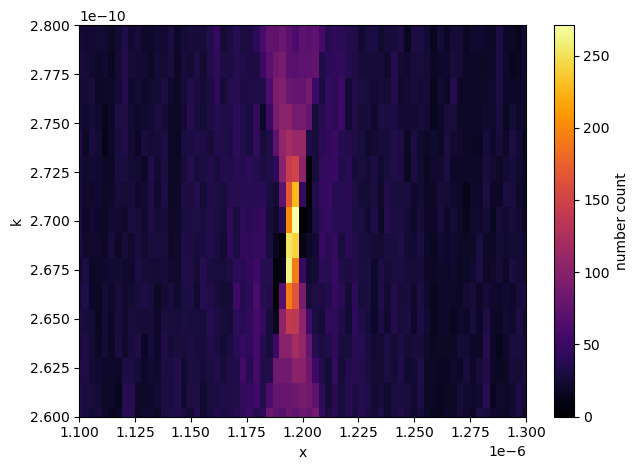

In [413]:
fig, ax = plt.subplots()
ax.set(ylabel="k", xlabel=r"x")
c = ax.pcolormesh(
    info['gridx'],
    np.squeeze(info['gridk']),
    hmap,
    cmap="inferno",
    shading="nearest",
)
fig.colorbar(c, label="number count")
plt.tight_layout()
plt.ylim([2.6e-10,2.8e-10])
plt.xlim([1.1e-6,1.3e-6])

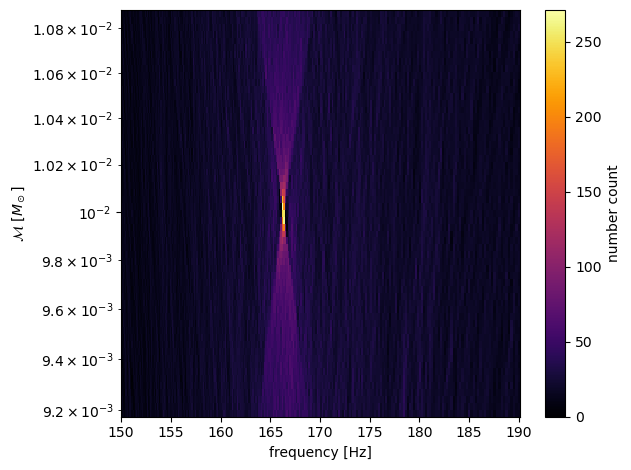

In [405]:
mcsss = pyhough.physics.calc_mc_with_k(info['gridk'])
fffss = pyhough.gfh.get_f0_from_x0(info['gridx'],n)
fig, ax = plt.subplots()#figsize=(0.8 * 16, 0.8 * 9))
ax.set(ylabel=r"$\mathcal{M}$ $[M_\odot]$", xlabel=r"frequency [Hz]")
c = ax.pcolormesh(
    fffss,
    np.squeeze(mcsss),
    hmap,
    cmap="inferno",
    shading="nearest",
)
fig.colorbar(c, label="number count")
plt.yscale('log')
plt.tight_layout()


In [392]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [411]:
len(np.unique(p[0,:]))*0.07

36.050000000000004